## Demand VS number of vehicles analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import matplotlib.pyplot as plt
import matplotlib
from pandas.tools.plotting import table
import math
import seaborn as sns
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')
%matplotlib inline
pd.options.mode.chained_assignment = None
palette = sns.color_palette()
font = {'family' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 

In [2]:
import seaborn
import sys
import six
import datetime
import matplotlib.backends.backend_pdf
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

def convertColumns(data, cols, func):
    newCols = data[cols].applymap(func)
    data1 = data.drop(cols, axis=1)
    return pd.merge(data1, newCols, left_index=True, right_index=True)
    
def todatetime(x):
    return np.datetime64(x)

def tohr(x):
    return x.to_datetime64().astype('datetime64[h]')

def tostr(x):
    return x.apply(str)

def formatCells(data):
    data = data.reset_index()
    data = data.round(3)
    for c in data.columns:
        if(data[c].dtype == 'datetime64[ns]'):
            data[c] = data[c].apply(lambda x: x.time())
    return data

def render_mpl_table(data, col_width=5.0, row_height=0.625, font_size=10,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0, title = "",
                     fig=None, **kwargs):
    data = formatCells(data)
    if fig is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = pp.subplots()
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    ax.set_title(title, fontsize = 16)
    return fig 

In [24]:
journeys = pd.read_csv('journey_logs.csv')

In [25]:
journeys = convertColumns(journeys, ['Booking Time','Pick-up Time','Drop-off Time'], todatetime)
journeys['Waiting Time'] = (journeys['Pick-up Time'] - journeys['Booking Time']).apply(lambda x: x.seconds/60)

In [26]:
journeys['Waiting Time'].var()

91.30046689366853

In [27]:
len(journeys[journeys['Waiting Time']<6])/584.0

0.4092465753424658

In [134]:
optimal = pd.read_csv('../one day simu/optimalValues2.csv')

In [135]:
optimal

,type,totalEnergy,averageWaitingTime,maxWaitingTime,minWaitingTime,stabilityWaitingTime,averageJourneyTime,averageOccupancy,averageLoadFactor,maxLoadFactor,minLoadFactor,stabilityLoadFactor,completedBookingsPercentage,completedBookingsLess6,less6onCompleted,variance
0,8v_hw_10max_autonomy13h,10.287087,5,54,0,54,34,2.343685,0.236460,0.265951,0.190151,0.075800,0.856164,0.54,0.630,52
1,8v_hw_10max_autonomy8h,16.618104,10,127,0,127,38,2.438855,0.253922,0.288011,0.210938,0.077072,0.833904,0.39,0.470,307
2,8v_hw_const_0.1,18.028176,15,167,0,167,40,2.343575,0.240448,0.607730,0.114883,0.492847,0.695205,0.27,0.390,662
3,8v_hw_max_10_manyCharging,14.250462,8,59,0,59,43,2.968109,0.308826,0.509177,0.082745,0.426433,0.808219,0.45,0.560,101
4,adaptVehicles,14.821165,8,35,0,35,55,3.086143,0.303171,0.382275,0.202236,0.180039,0.785959,0.38,0.480,59
5,optionalStops,25.923899,5,57,0,57,46,2.871941,0.290054,0.399768,0.150028,0.249740,0.806507,0.50,0.625,36
6,adaptVehicles2,16.579193,7,96,0,96,37,4.199084,0.453449,0.567189,0.356916,0.210273,0.828767,0.41,0.490,91


In [144]:
percdiff = pd.DataFrame()
percdiff['totalEnergy'] = ((optimal['totalEnergy']-16.618104)/16.618104)*100
percdiff['averageWaitingTime'] = ((optimal['averageWaitingTime']-10)/10)*100
percdiff['waitingStability']=((optimal['variance']-307)/307)*100
percdiff['averageLoadFactor']=((optimal['averageLoadFactor']-0.253922)/0.253922)*100
percdiff['completedBookingsPercentage']=((optimal['completedBookingsPercentage']-0.833904)/0.833904)*100
percdiff['less6onCompleted']=((optimal['less6onCompleted']-0.39)/0.39)*100
percdiff['Strategy'] = optimal['type']

In [60]:
percdiff = pd.DataFrame()
percdiff['totalEnergy'] = ((optimal['totalEnergy']-18.028176)/18.028176)*100
percdiff['averageWaitingTime'] = ((optimal['averageWaitingTime']-15)/15)*100
percdiff['averageLoadFactor']=((optimal['averageLoadFactor']-0.240448)/0.240448)*100
percdiff['completedBookingsPercentage']=((optimal['completedBookingsPercentage']-0.695205)/0.695205)*100
percdiff['less6onCompleted']=((optimal['less6onCompleted']-0.39)/0.39)*100
percdiff['Strategy'] = optimal['type']

In [153]:
percdiff.iloc[3].values

array([-14.247365963650241, -20.0, -67.100977198697066, 21.622577784516501,
       -3.0800693986358052, 43.589743589743598, '8v_hw_max_10_manyCharging'], dtype=object)

In [145]:
percdiff

,totalEnergy,averageWaitingTime,waitingStability,averageLoadFactor,completedBookingsPercentage,less6onCompleted,Strategy
0,-38.097111,-50.0,-83.061889,-6.876982,2.669418,61.538462,8v_hw_10max_autonomy13h
1,-0.000002,0.0,0.000000,-0.000088,0.000013,20.512821,8v_hw_10max_autonomy8h
2,8.485154,50.0,115.635179,-5.306370,-16.632433,0.000000,8v_hw_const_0.1
3,-14.247366,-20.0,-67.100977,21.622578,-3.080069,43.589744,8v_hw_max_10_manyCharging
4,-10.813143,-20.0,-80.781759,19.395441,-5.749474,23.076923,adaptVehicles
5,55.997933,-50.0,-88.273616,14.229589,-3.285408,60.256410,optionalStops
6,-0.234147,-30.0,-70.358306,78.578069,-0.616003,25.641026,adaptVehicles2


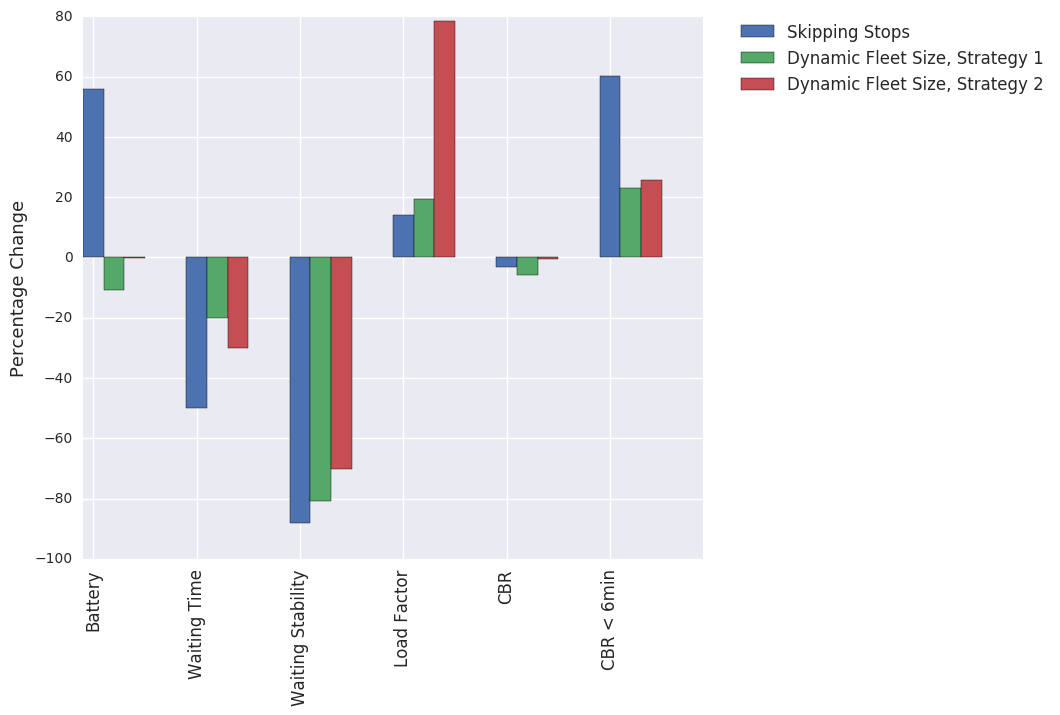

In [151]:
N = 6
optStop = (55.997933462204827, -50.0, -88.273615635179141, 14.229589414859678,
       -3.2854082346409097, 60.256410256410255)

ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots(figsize=(8, 7))
rects1 = ax.bar(ind, optStop, width, color=palette[0])

dynamic1 = (-10.813142853119698, -20.0, -80.781758957654731, 19.395440521104923,
       -5.7494742668220749, 23.076923076923066)
dynamic2=(-0.23414718309620838, -30.0, -70.358306188925084,
       78.578068550578521, -0.61600336633473729, 25.641025641025632)
rects2 = ax.bar(ind + width, dynamic1, width, color=palette[1])
rects3 = ax.bar(ind + 0.4, dynamic2, width, color=palette[2])


# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage Change',size=13)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Battery', 'Waiting Time', 'Waiting Stability', 'Load Factor', "CBR","CBR < 6min"), rotation=90)

ax.legend((rects1[0], rects2[0], rects3[0]), ("Skipping Stops", "Dynamic Fleet Size, Strategy 1","Dynamic Fleet Size, Strategy 2",),prop={'size': 12},bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pp.savefig("strategyCompare.pdf",bbox_inches='tight')

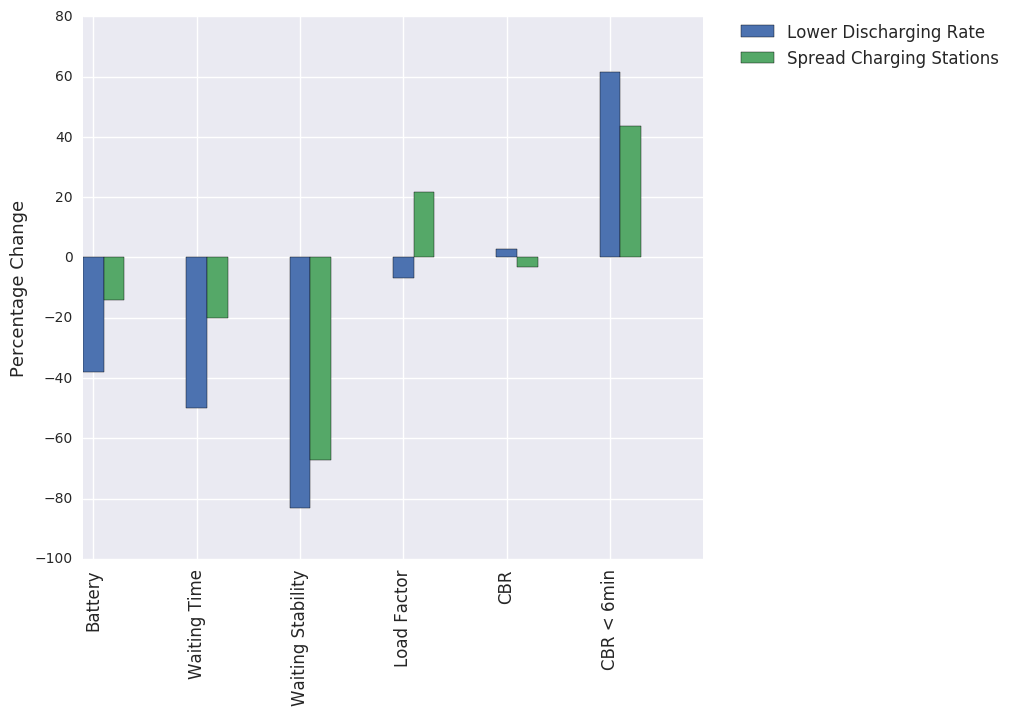

In [158]:
N = 6
betterbattery = (-38.097110579522194, -50.0, -83.061889250814332,
       -6.8769820535439816, 2.669418009986761, 61.538461538461533)

ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots(figsize=(8, 7))
rects1 = ax.bar(ind, betterbattery, width, color=palette[0])

spreadstations = (-14.247365963650241, -20.0, -67.100977198697066, 21.622577784516501,
       -3.0800693986358052, 43.589743589743598)

rects2 = ax.bar(ind + width, spreadstations, width, color=palette[1])

# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage Change',size=13)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Battery', 'Waiting Time', 'Waiting Stability', 'Load Factor', "CBR","CBR < 6min"), rotation=90)

ax.legend((rects1[0], rects2[0]), ("Lower Discharging Rate", "Spread Charging Stations","Dynamic Fleet Size, Strategy 2",),prop={'size': 12},bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pp.savefig("batteryCompare.pdf",bbox_inches='tight')

ValueError: left cannot be >= right

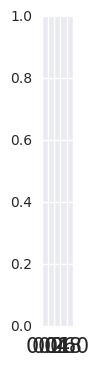

In [58]:
sns.factorplot(x="Strategy", y="totalEnergy", hue="Strategy",
               data=percdiff[1:3], kind="bar", aspect=.1, legend_out=False)

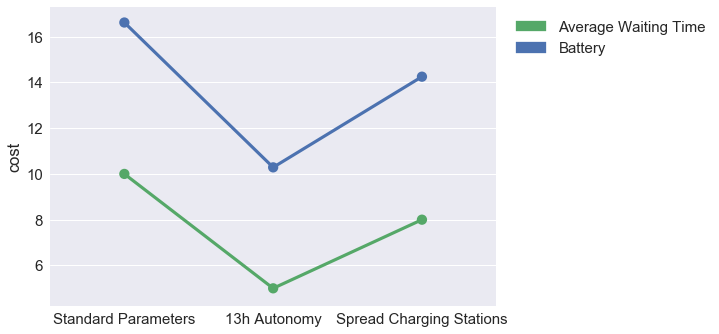

In [150]:
x = ["Standard Parameters","13h Autonomy", "Spread Charging Stations"]
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":15,"axes.labelsize":20})  
sns.set(font_scale = 1.5)
g = sns.pointplot(x="type", y="totalEnergy", data=optimal, label = "Battery",legend=True)
h = sns.pointplot(x="type", y="averageWaitingTime", data=optimal, label = "Battery",legend=True,color = palette[1])
g.set_xticklabels(x)
g.set_ylabel("cost")
g.set_xlabel("")
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color=palette[1], label='Average Waiting Time')
red_patch2 = mpatches.Patch(color=palette[0], label='Battery')

#red_patch3 = mpatches.Patch(color=palette[1], label='Average Waiting Time')


pp.legend(handles=[red_patch,red_patch2],loc='upper right', bbox_to_anchor=(1.5, 1))
pp.savefig("batteryparam",bbox_inches='tight')

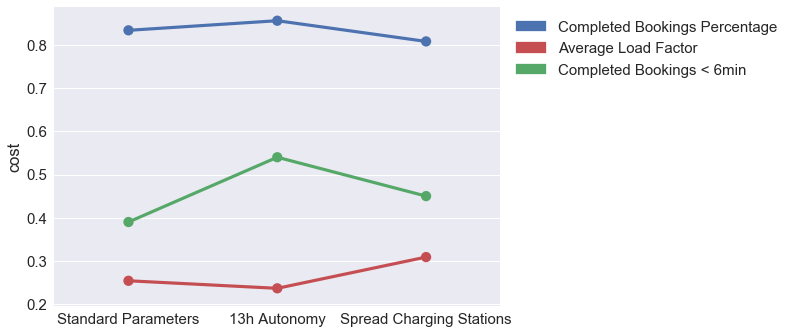

In [151]:
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":15,"axes.labelsize":20})  
sns.set(font_scale = 1.5)
g = sns.pointplot(x="type", y="completedBookingsPercentage", data=optimal, label = "Battery",legend=True)
h = sns.pointplot(x="type", y="completedBookingsLess6", data=optimal, label = "Battery",legend=True,color = palette[1])
h = sns.pointplot(x="type", y="averageLoadFactor", data=optimal, label = "Battery",legend=True,color = palette[2])
g.set_xticklabels(x)
g.set_ylabel("cost")
g.set_xlabel("")
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color=palette[0], label='Completed Bookings Percentage')
red_patch2 = mpatches.Patch(color=palette[2], label='Average Load Factor')

red_patch3 = mpatches.Patch(color=palette[1], label='Completed Bookings < 6min')


pp.legend(handles=[red_patch,red_patch2,red_patch3],loc='upper right', bbox_to_anchor=(1.65, 1))
pp.savefig("batteryparambatt",bbox_inches='tight')

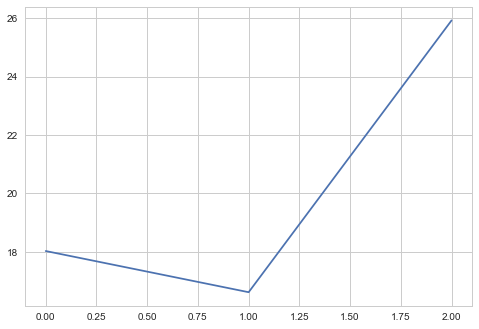

In [94]:
pp.plot(range(len(optimal['type'])), optimal['totalEnergy'])

In [74]:
x = ['Constant Stopping Time',"Adapt Waiting Time","Skip Stops"]

ValueError: could not convert string to float: Constant Stopping Time

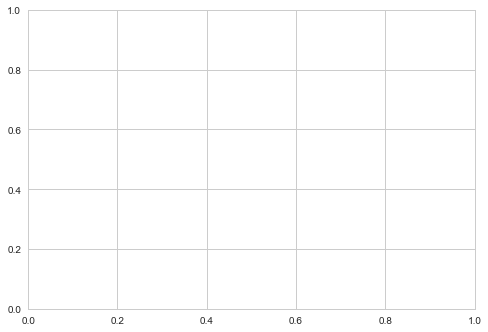

In [76]:
from matplotlib.ticker import FuncFormatter, MultipleLocator
fig, ax = pp.subplots()
ax.plot(x, optimal['totalEnergy'], label="Battery")
ax.legend()


In [55]:
fig.set_xticklabels(['1',"2","3"])

In [21]:
journeys[journeys['Waiting Time']<6]

,User ID,Seat Count,Vehicle ID,Booking Time,Pick-up Time,Drop-off Time,Waiting Time
0,68ee4f72-19b4-402a-8529-76882fa29706,1,0a38f434-5846-48b2-9cb6-75afd9c217d2,2017-12-01 00:52:37.296,2017-12-01 00:56:20.376,2017-12-01 01:02:03.816,3
4,530db241-e922-4012-adef-250c1c073c8a,1,8919b741-eee9-4d96-8649-d5aa95c29a49,2017-12-01 01:02:28.728,2017-12-01 01:07:09.024,2017-12-01 01:17:10.200,4
5,0d7e5d83-9eeb-494e-8b85-a1b96172b085,1,8919b741-eee9-4d96-8649-d5aa95c29a47,2017-12-01 00:49:20.856,2017-12-01 00:49:38.976,2017-12-01 01:17:39.336,0
6,3a5e928f-a861-48e2-b920-eaa1079605f8,1,d6ee24d2-f4b8-4599-b29e-ef1302a6b1a8,2017-12-01 00:55:29.352,2017-12-01 00:57:07.200,2017-12-01 01:20:05.112,1
9,c6a57d7d-ad28-47e7-878c-ee7af1cb2974,2,d6ee24d2-f4b8-4599-b29e-ef1302a6b1a9,2017-12-01 00:55:29.496,2017-12-01 00:57:16.272,2017-12-01 01:28:05.736,1
11,86fbe939-9768-4004-bf49-b98c4e4b8af2,1,8919b741-eee9-4d96-8649-d5aa95c29a48,2017-12-01 01:14:44.928,2017-12-01 01:18:30.288,2017-12-01 01:49:37.608,3
13,06f2b9f5-5328-4f9a-8935-e7d7d76f9ba2,1,8919b741-eee9-4d96-8649-d5aa95c29a49,2017-12-01 01:34:48.264,2017-12-01 01:37:39.792,2017-12-01 01:51:20.040,2
14,fe6db934-98f2-4c28-bc1d-156094d1eeb9,1,8919b741-eee9-4d96-8649-d5aa95c29a46,2017-12-01 01:18:01.296,2017-12-01 01:21:18.840,2017-12-01 01:51:53.880,3
15,64e478af-8a9a-42f2-bc9a-227147af6a7b,1,4bf166af-9eeb-432a-bad5-4b93b827ac56,2017-12-01 01:39:19.272,2017-12-01 01:42:48.936,2017-12-01 01:57:29.832,3
17,2ddb6b74-1af6-47e1-a062-1edfbe8a6aa7,1,8919b741-eee9-4d96-8649-d5aa95c29a47,2017-12-01 01:48:19.512,2017-12-01 01:50:06.192,2017-12-01 02:08:26.112,1


In [14]:
journeys

,Booking Time,User ID,Pick-up Time,Drop-off Time,Seat Count,Vehicle ID
0,2017-12-01T00:52:37.296Z,68ee4f72-19b4-402a-8529-76882fa29706,2017-12-01T00:56:20.376Z,2017-12-01T01:02:03.816Z,1,0a38f434-5846-48b2-9cb6-75afd9c217d2
1,2017-12-01T00:55:29.712Z,13e1752d-6eae-49af-9863-ff99a852c500,2017-12-01T01:03:26.568Z,2017-12-01T01:05:25.656Z,1,0a38f434-5846-48b2-9cb6-75afd9c217d2
2,2017-12-01T00:55:29.304Z,e7c4dda7-1a3e-4973-adb6-4c9f431ca55e,2017-12-01T01:02:28.560Z,2017-12-01T01:07:04.320Z,4,d6ee24d2-f4b8-4599-b29e-ef1302a6b1a9
3,2017-12-01T00:55:29.784Z,6aec6104-0bb1-4a50-a97b-e6af86712937,2017-12-01T01:05:21.456Z,2017-12-01T01:14:36.792Z,1,8919b741-eee9-4d96-8649-d5aa95c29a46
4,2017-12-01T01:02:28.728Z,530db241-e922-4012-adef-250c1c073c8a,2017-12-01T01:07:09.024Z,2017-12-01T01:17:10.200Z,1,8919b741-eee9-4d96-8649-d5aa95c29a49
5,2017-12-01T00:49:20.856Z,0d7e5d83-9eeb-494e-8b85-a1b96172b085,2017-12-01T00:49:38.976Z,2017-12-01T01:17:39.336Z,1,8919b741-eee9-4d96-8649-d5aa95c29a47
6,2017-12-01T00:55:29.352Z,3a5e928f-a861-48e2-b920-eaa1079605f8,2017-12-01T00:57:07.200Z,2017-12-01T01:20:05.112Z,1,d6ee24d2-f4b8-4599-b29e-ef1302a6b1a8
7,2017-12-01T00:55:29.592Z,57798943-dea9-4d41-b2de-f447513f04be,2017-12-01T01:03:42.840Z,2017-12-01T01:20:05.136Z,3,d6ee24d2-f4b8-4599-b29e-ef1302a6b1a9
8,2017-12-01T01:03:18.168Z,a782fa8b-4cf4-4ae3-8339-c317eed5a4f7,2017-12-01T01:13:57.648Z,2017-12-01T01:24:57.816Z,1,0a38f434-5846-48b2-9cb6-75afd9c217d2
9,2017-12-01T00:55:29.496Z,c6a57d7d-ad28-47e7-878c-ee7af1cb2974,2017-12-01T00:57:16.272Z,2017-12-01T01:28:05.736Z,2,d6ee24d2-f4b8-4599-b29e-ef1302a6b1a9


In [9]:
journeys["Pick-up Time"]

0      2017-12-01T00:56:20.376Z
1      2017-12-01T01:03:26.568Z
2      2017-12-01T01:02:28.560Z
3      2017-12-01T01:05:21.456Z
4      2017-12-01T01:07:09.024Z
5      2017-12-01T00:49:38.976Z
6      2017-12-01T00:57:07.200Z
7      2017-12-01T01:03:42.840Z
8      2017-12-01T01:13:57.648Z
9      2017-12-01T00:57:16.272Z
10     2017-12-01T01:07:08.496Z
11     2017-12-01T01:18:30.288Z
12     2017-12-01T01:35:56.424Z
13     2017-12-01T01:37:39.792Z
14     2017-12-01T01:21:18.840Z
15     2017-12-01T01:42:48.936Z
16     2017-12-01T01:42:27.600Z
17     2017-12-01T01:50:06.192Z
18     2017-12-01T01:47:05.832Z
19     2017-12-01T02:04:55.224Z
20     2017-12-01T02:29:14.688Z
21     2017-12-01T02:26:17.640Z
22     2017-12-01T02:38:42.408Z
23     2017-12-01T02:23:07.800Z
24     2017-12-01T02:12:52.344Z
25     2017-12-01T02:23:40.104Z
26     2017-12-01T02:23:40.104Z
27     2017-12-01T02:17:06.936Z
28     2017-12-01T02:52:04.344Z
29     2017-12-01T02:49:21.048Z
                 ...           
376    2

In [8]:
journeys['waitingTime'] = journeys["Pick-up Time"] -journeys["Drop-off Time"]

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [2]:
stability = pd.read_csv('stability.csv')

In [3]:
stability

,ratio,demands,vehicles,totalEnergy,averageWaitingTime,maxWaitingTime,minWaitingTime,stabilityWaitingTime,averageJourneyTime,averageOccupancy,averageLoadFactor,maxLoadFactor,minLoadFactor,stabilityLoadFactor,completedBookingsPercentage
0,144,27.0,5,0.320778,8,19,2,17,26,0.590252,0.065447,0.127936,0.000000,0.127936,0.222222
1,144,27.0,5,0.347617,12,21,2,19,24,0.342342,0.052168,0.208144,0.000000,0.208144,0.148148
2,144,27.0,5,0.328641,14,19,6,13,23,0.284397,0.049985,0.167385,0.000000,0.167385,0.148148
3,24,27.0,5,0.402208,7,16,1,15,21,1.274974,0.114770,0.253992,0.000000,0.253992,0.296296
4,24,27.0,5,0.418168,7,15,0,15,31,1.422358,0.116733,0.228339,0.000000,0.228339,0.296296
5,24,27.0,5,0.415402,9,17,1,16,22,0.984773,0.097788,0.206387,0.000000,0.206387,0.259259
6,48,27.0,5,0.398464,13,13,1,12,47,1.178000,0.118689,0.179944,0.042944,0.136999,0.256296
7,48,27.0,5,0.361778,6,11,1,10,17,0.511667,0.061715,0.142585,0.000000,0.142585,0.259259
8,1,27.0,5,0.414156,3,8,0,8,12,0.582079,0.059584,0.144992,0.000000,0.144992,0.296296


In [4]:
avgstab = stability.groupby("ratio").mean()

In [5]:
avgstab

,demands,vehicles,totalEnergy,averageWaitingTime,maxWaitingTime,minWaitingTime,stabilityWaitingTime,averageJourneyTime,averageOccupancy,averageLoadFactor,maxLoadFactor,minLoadFactor,stabilityLoadFactor,completedBookingsPercentage
ratio,,,,,,,,,,,,,,
1,27.0,5.0,0.414156,3.000000,8.000000,0.000000,8.000000,12.000000,0.582079,0.059584,0.144992,0.000000,0.144992,0.296296
24,27.0,5.0,0.411926,7.666667,16.000000,0.666667,15.333333,24.666667,1.227368,0.109764,0.229573,0.000000,0.229573,0.283951
48,27.0,5.0,0.380121,9.500000,12.000000,1.000000,11.000000,32.000000,0.844833,0.090202,0.161264,0.021472,0.139792,0.257778
144,27.0,5.0,0.332346,11.333333,19.666667,3.333333,16.333333,24.333333,0.405664,0.055866,0.167822,0.000000,0.167822,0.172840


In [16]:
pp.figure(figsize=(10,8))

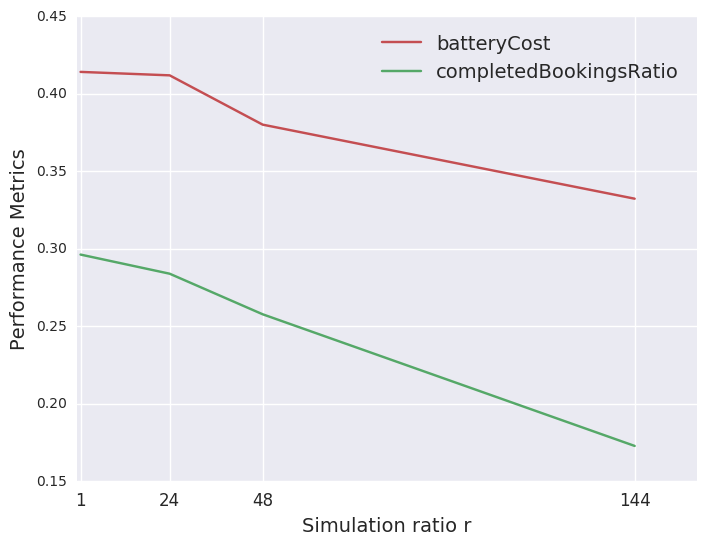

In [25]:
pp.figure(figsize=(8,6))
pp.plot(avgstab.index, avgstab['totalEnergy'], color = palette[2], label='batteryCost');
pp.plot(avgstab.index, avgstab['completedBookingsPercentage'], color = palette[1], label='completedBookingsRatio');
#pp.plot(vehicles, performances.groupby('vehicles').mean()['score'], color = palette[0], label='Average journey time');
pp.legend(loc=1,fontsize=14)
pp.xticks([1,24,48,144])
pp.xlabel("Simulation ratio r",fontsize=14)
pp.ylabel("Performance Metrics",fontsize=14)
#pp.title("Average costs")
pp.savefig('stability.pdf')

### Distribution of demand

In [103]:
bookings = pd.read_csv('bookings.csv')

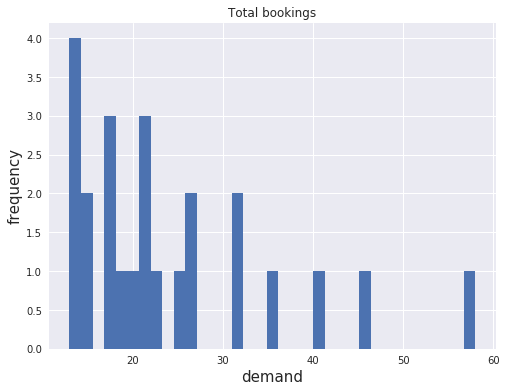

In [104]:
fig = bookings.hist(column='Total bookings', bins=35, figsize = (8,6))
fig[0][0].set_xlabel("demand",fontsize=15)
fig[0][0].set_ylabel("frequency",fontsize=15)
pp.savefig("demand_freq")

In [105]:
fig[0][0]

In [106]:
bookings.median()

time              11.5
Stop 1             1.0
Stop 10            0.0
Stop 11            1.0
Stop 12            1.0
Stop 13            0.0
Stop 14            0.0
Stop 15            0.5
Stop 16            0.0
Stop 17            0.0
Stop 18            0.0
Stop 19            0.0
Stop 2             1.0
Stop 20            0.0
Stop 21            1.0
Stop 22            1.0
Stop 23            1.0
Stop 24            1.0
Stop 25            0.0
Stop 26            0.0
Stop 27            1.0
Stop 28            1.0
Stop 29            1.0
Stop 3             1.0
Stop 30            1.0
Stop 31            1.0
Stop 32            1.0
Stop 4             1.0
Stop 5             0.0
Stop 6             0.0
Stop 7             0.0
Stop 8             0.0
Stop 9             1.0
Total bookings    21.0
dtype: float64

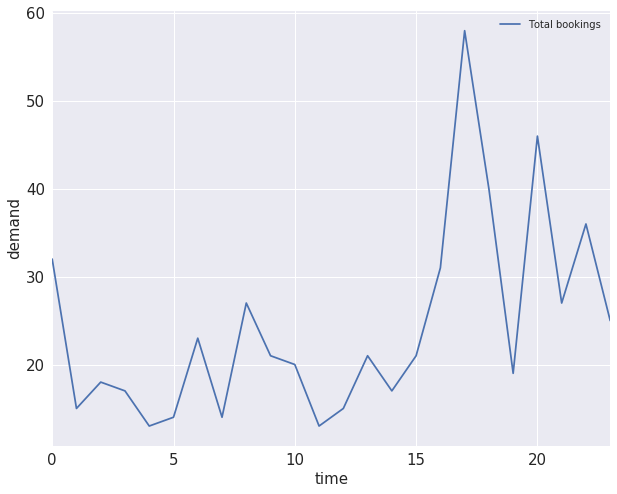

In [115]:
fig =bookings.plot(x='time', y='Total bookings',figsize = (10,8), fontsize = 15)
fig.set_xlabel("time",fontsize=15)
fig.set_ylabel("demand",fontsize=15)
pp.savefig("demand")

## Find optimal number of vehicles

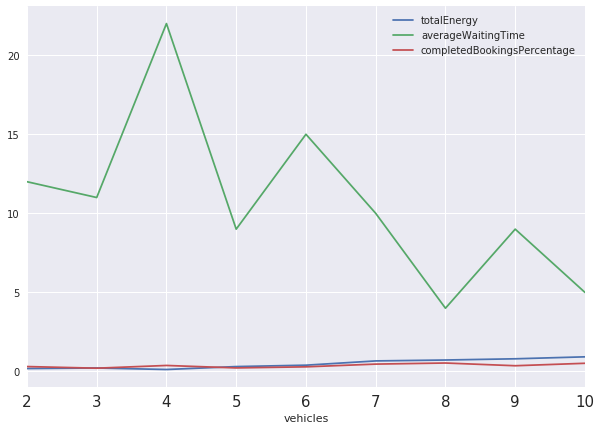

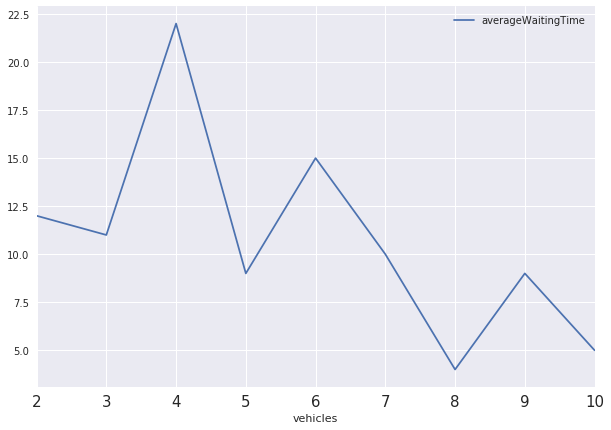

In [331]:
performances = pd.read_csv('optimalNumberVehicles.csv')
performances = performances.sort_values(['demands','vehicles'])
analyze = 58
 
demand = performances[performances['demands'] == analyze]
cols = ['totalEnergy','averageWaitingTime','completedBookingsPercentage']
demand.plot(x='vehicles', y=cols,figsize = (10,7))
demand.plot(x='vehicles', y='averageWaitingTime',figsize = (10,7))

In [300]:
performances[20:]

,time,demands,vehicles,totalEnergy,averageWaitingTime,maxWaitingTime,minWaitingTime,stabilityWaitingTime,averageJourneyTime,averageOccupancy,averageLoadFactor,maxLoadFactor,minLoadFactor,stabilityLoadFactor,completedBookingsPercentage
24,2017-01-01T13:00:00.000Z,21.0,4,0.398665,9,12,2,10,23,1.297608,0.077465,0.243649,0.000000,0.243649,0.380952
23,2017-01-01T13:00:00.000Z,21.0,5,0.471490,9,13,1,12,26,0.691667,0.054575,0.197491,0.000000,0.197491,0.333333
22,2017-01-01T13:00:00.000Z,21.0,6,0.559130,1,4,0,4,14,0.273375,0.027559,0.087967,0.000000,0.087967,0.285714
21,2017-01-01T13:00:00.000Z,21.0,7,0.653519,2,4,1,3,14,0.511015,0.050366,0.271281,0.000000,0.271281,0.428571
20,2017-01-01T13:00:00.000Z,21.0,8,0.667949,1,4,0,4,17,0.461928,0.045329,0.161363,0.000000,0.161363,0.476190
19,2017-01-01T13:00:00.000Z,21.0,9,0.526507,7,7,0,7,64,0.221255,0.025987,0.106171,0.000000,0.106171,0.285714
18,2017-01-01T13:00:00.000Z,21.0,10,0.915000,1,4,0,4,17,0.374984,0.035765,0.208448,0.000000,0.208448,0.476190
50,2017-01-01T13:00:00.000Z,23.0,2,0.202521,11,26,4,22,16,1.378378,0.137313,0.151176,0.123451,0.027725,0.347826
41,2017-01-01T13:00:00.000Z,23.0,3,0.198798,21,24,4,20,23,0.142361,0.027604,0.082812,0.000000,0.082812,0.086957
40,2017-01-01T13:00:00.000Z,23.0,4,0.335366,11,17,0,17,38,1.066327,0.101316,0.202900,0.032967,0.169933,0.391304


In [301]:
performances.columns.values

array(['time', 'demands', 'vehicles', 'totalEnergy', 'averageWaitingTime',
       'maxWaitingTime', 'minWaitingTime', 'stabilityWaitingTime',
       'averageJourneyTime', 'averageOccupancy', 'averageLoadFactor',
       'maxLoadFactor', 'minLoadFactor', 'stabilityLoadFactor',
       'completedBookingsPercentage'], dtype=object)

### Clean the data

In [332]:
low = .05
high = .95
def clean_col(col):
    column = performances[[col]]
    down_quantiles = column.quantile(low)
    high_quantiles = column.quantile(high)
    outliers_low = (column < down_quantiles)
    outliers_high = (column > high_quantiles)
    column = column.mask(outliers_low, down_quantiles, axis=1)  
    column = column.mask(outliers_high, high_quantiles, axis=1)  
    return column

In [333]:
performances['averageWaitingTime'] = clean_col('averageWaitingTime')

In [334]:
performances['totalEnergy'] = clean_col('totalEnergy')

In [335]:
# scale for each group
scale = performances.copy()
mms = preprocessing.MinMaxScaler()
num_instances = int(len(performances)/9)
for i in range(0, num_instances):
    newCols = mms.fit_transform(scale[cols].iloc[i*9:i*9+9])
    for j in range(0, len(cols)):
        for k in range(0,9):
            scale[cols[j]].iloc[i*9+k] = newCols[k][j]

In [336]:
num_instances = int(len(performances)/9)


performances['score'] = scale.apply(lambda x: (x.averageWaitingTime+x.totalEnergy)/np.exp(x.completedBookingsPercentage), axis = 1)

In [337]:
optimalVehicles = performances.groupby(['demands'])['score'].transform(min) == performances['score']
optimalVehicles = performances[optimalVehicles]
optimalVehicles

,time,demands,vehicles,totalEnergy,averageWaitingTime,maxWaitingTime,minWaitingTime,stabilityWaitingTime,averageJourneyTime,averageOccupancy,averageLoadFactor,maxLoadFactor,minLoadFactor,stabilityLoadFactor,completedBookingsPercentage,score
5,2017-01-01T04:00:00.000Z,13.0,3,0.318643,7.0,19,0,19,18,1.223032,0.120334,0.235721,0.045968,0.189753,0.769231,0.192356
56,2017-01-01T13:00:00.000Z,15.0,5,0.429263,2.0,10,0,10,15,0.614600,0.061302,0.110547,0.000000,0.110547,0.666667,0.132116
25,2017-01-01T13:00:00.000Z,21.0,3,0.203280,3.0,11,0,11,15,0.726852,0.066282,0.109830,0.000000,0.109830,0.238095,0.088188
50,2017-01-01T13:00:00.000Z,23.0,2,0.202521,11.0,26,4,22,16,1.378378,0.137313,0.151176,0.123451,0.027725,0.347826,0.260973
64,2017-01-01T13:00:00.000Z,25.0,3,0.271394,4.0,12,0,12,16,2.164850,0.198316,0.343197,0.062692,0.280505,0.440000,0.185728
35,2017-01-01T13:00:00.000Z,27.0,7,0.705844,4.0,14,0,14,21,0.866270,0.085586,0.237067,0.000000,0.237067,0.518519,0.374812
71,2017-01-01T13:00:00.000Z,31.0,4,0.287301,4.0,6,0,6,17,0.999053,0.101368,0.224320,0.021476,0.202844,0.451613,0.236536
82,2017-01-01T13:00:00.000Z,36.0,6,0.252455,5.0,15,0,15,12,0.664815,0.032338,0.082179,0.000000,0.082179,0.472222,0.093250
87,2017-01-01T13:00:00.000Z,40.0,4,0.313115,5.0,13,0,13,18,1.103220,0.138744,0.199029,0.062176,0.136853,0.300000,0.253584
95,2017-01-01T13:00:00.000Z,46.0,5,0.397095,3.0,10,0,10,18,1.875449,0.196210,0.615380,0.000000,0.615380,0.304348,0.180502


R^2 value: 0.389340874176
RSS: 21.2065260059


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

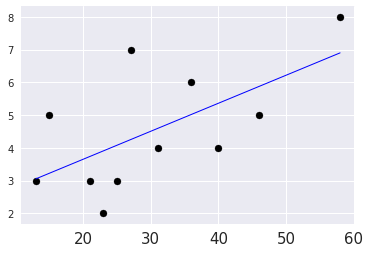

In [338]:
linear_regression_one(optimalVehicles,"demands","vehicles")


### Impact of vehicles on different costs

In [339]:
vehicles = range(2,11)

#### Energy cost

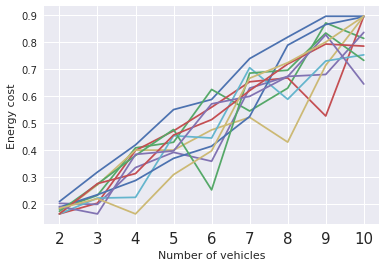

In [340]:
for i in range(0,num_instances):
    pp.plot(vehicles, performances['totalEnergy'].iloc[(i*9):(i*9+9)])
pp.xticks(vehicles)
pp.xlabel("Number of vehicles")
pp.ylabel("Energy cost")

In [341]:
np.corrcoef(performances['demands'], performances['averageLoadFactor'])

array([[ 1.        ,  0.53418504],
       [ 0.53418504,  1.        ]])

In [342]:
np.corrcoef(performances['completedBookingsPercentage'], performances['demands'])

array([[ 1.        , -0.38962796],
       [-0.38962796,  1.        ]])

In [343]:
np.corrcoef(performances['averageWaitingTime'], performances['vehicles'])

array([[ 1.        , -0.57586635],
       [-0.57586635,  1.        ]])

In [344]:
np.corrcoef(performances['averageWaitingTime'], performances['demands'])

array([[ 1.        ,  0.24818231],
       [ 0.24818231,  1.        ]])

#### Average waiting time

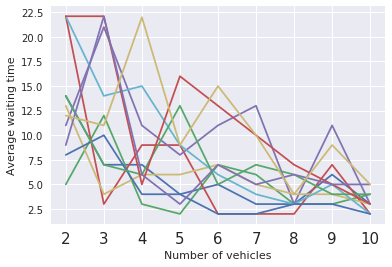

In [345]:
for i in range(0,num_instances):
    pp.plot(vehicles, performances['averageWaitingTime'].iloc[(i*9):(i*9+9)])
pp.xticks(vehicles)
pp.xlabel("Number of vehicles")
pp.ylabel("Average waiting time")

#### Average journey time

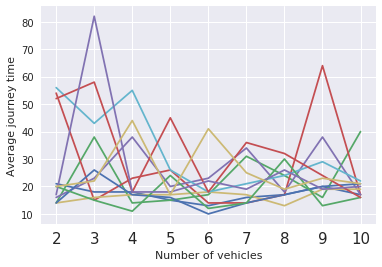

In [346]:
for i in range(0,num_instances):
    pp.plot(vehicles, performances['averageJourneyTime'].iloc[(i*9):(i*9+9)])
pp.xticks(vehicles)
pp.xlabel("Number of vehicles")
pp.ylabel("Average journey time")

#### Average load factor

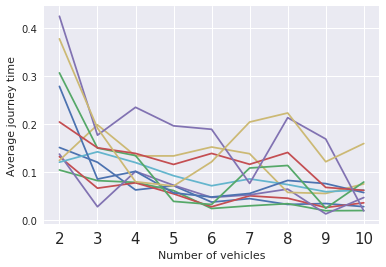

In [347]:
for i in range(0,num_instances):
    pp.plot(vehicles, performances['averageLoadFactor'].iloc[(i*9):(i*9+9)])
pp.xticks(vehicles)
pp.xlabel("Number of vehicles")
pp.ylabel("Average journey time")

#### Averages over all instances

In [348]:
averages = performances.groupby('vehicles').mean()

In [349]:
averages

,demands,totalEnergy,averageWaitingTime,maxWaitingTime,minWaitingTime,stabilityWaitingTime,averageJourneyTime,averageOccupancy,averageLoadFactor,maxLoadFactor,minLoadFactor,stabilityLoadFactor,completedBookingsPercentage,score
vehicles,,,,,,,,,,,,,,
2,30.454545,0.180323,13.845455,25.181818,0.818182,24.363636,27.090909,2.055734,0.214621,0.307243,0.122000,0.185244,0.330074,0.625108
3,30.454545,0.237666,12.109091,23.363636,0.727273,22.636364,32.363636,1.179935,0.126404,0.244715,0.030079,0.214636,0.315509,0.593836
4,30.000000,0.342915,8.333333,14.583333,0.333333,14.250000,24.166667,1.245719,0.116285,0.220623,0.029912,0.190710,0.431980,0.349859
5,30.454545,0.434517,7.636364,15.454545,0.363636,15.090909,21.818182,0.910412,0.089278,0.217522,0.003791,0.213731,0.416254,0.444804
6,30.454545,0.476984,7.090909,13.272727,0.090909,13.181818,18.636364,0.776439,0.079482,0.198670,0.011543,0.187127,0.366691,0.512357
7,30.454545,0.618308,6.000000,12.363636,0.181818,12.181818,21.545455,0.845762,0.079998,0.247764,0.000000,0.247764,0.452391,0.458343
8,31.000000,0.698221,4.000000,10.100000,0.200000,9.900000,22.400000,0.987425,0.102289,0.293824,0.005777,0.288047,0.487156,0.396973
9,30.454545,0.776769,5.636364,14.818182,0.090909,14.727273,25.909091,0.606091,0.060420,0.219365,0.000000,0.219365,0.396682,0.684701
10,30.454545,0.822754,3.272727,8.636364,0.181818,8.454545,20.545455,0.592975,0.058531,0.223943,0.000000,0.223943,0.442536,0.556211


In [350]:
averages["averageWaitingTime"][2] = 16.8

In [351]:
averages["averageWaitingTime"][9] = 3.3
averages["averageLoadFactor"][8] = 0.07

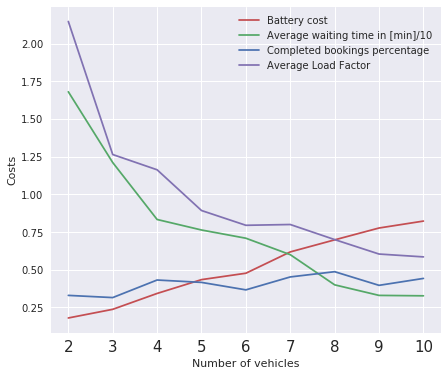

In [352]:
pp.figure(figsize=(7,6))
pp.plot(vehicles, averages['totalEnergy'], color = palette[2], label='Battery cost');
pp.plot(vehicles, averages['averageWaitingTime']/10, color = palette[1], label='Average waiting time in [min]/10');
pp.plot(vehicles, averages['completedBookingsPercentage'], color = palette[0], label='Completed bookings percentage');
pp.plot(vehicles, averages['averageLoadFactor']*10, color = palette[3], label='Average Load Factor');


pp.legend(loc=1)
pp.xticks(vehicles)
pp.xlabel("Number of vehicles")
pp.ylabel("Costs")
pp.savefig('vehicleimpact.png')

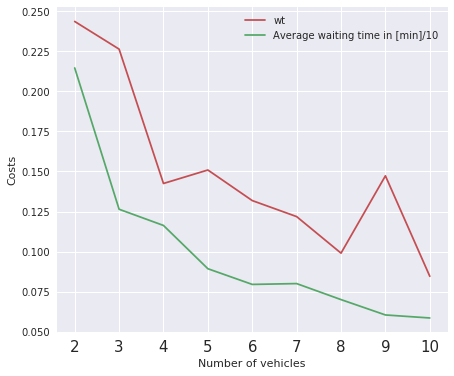

In [353]:
pp.figure(figsize=(7,6))
pp.plot(vehicles, averages['stabilityWaitingTime']/100, color = palette[2], label='wt');
pp.plot(vehicles, averages['averageLoadFactor'], color = palette[1], label='Average waiting time in [min]/10');
pp.legend(loc=1)
pp.xticks(vehicles)
pp.xlabel("Number of vehicles")
pp.ylabel("Costs")
#pp.savefig('vehicleimpact.png')

We compute the difference in cost between 2 vehicles and 10 vehicles

In [354]:
def increase(cost):
    print('Low: '+str(averages[cost].iloc[0]))
    print('High: '+str(averages[cost].iloc[8]))
    difference = averages[cost].iloc[8]-averages[cost].iloc[0]
    print('Difference: '+str(difference))
    increase = averages[cost].iloc[8]/averages[cost].iloc[0]
    print('Increase: '+str(increase))

In [355]:
def decrease(cost):
    print('High: '+str(averages[cost].iloc[0]))
    print('Low: '+str(averages[cost].iloc[8]))
    difference = averages[cost].iloc[0]-averages[cost].iloc[8]
    print('Difference: '+str(difference))
    increase = averages[cost].iloc[0]/averages[cost].iloc[8]
    print('Decrease: '+str(increase))

In [356]:
increase('totalEnergy')

Low: 0.180322550359
High: 0.822753784075
Difference: 0.642431233716
Increase: 4.56267828087


In [357]:
decrease('averageWaitingTime')

High: 16.8
Low: 3.27272727273
Difference: 13.5272727273
Decrease: 5.13333333333


In [358]:
decrease('averageJourneyTime')

High: 27.0909090909
Low: 20.5454545455
Difference: 6.54545454545
Decrease: 1.3185840708


In [359]:
increase("completedBookingsPercentage")

Low: 0.330074044085
High: 0.44253647216
Difference: 0.112462428075
Increase: 1.34071878747


In [360]:
decrease('averageLoadFactor')

High: 0.214621400537
Low: 0.0585313774037
Difference: 0.156090023133
Decrease: 3.66677515645


# Linear Regression: number of vehicles and demands to predict costs

## Only vehicles

In [361]:
from sklearn import linear_model
# Linear regression Cost~vehicles
def linear_regression_one(data,feature,cost):
    lr = linear_model.LinearRegression()
    #lr = linear_model.RANSACRegressor(linear_model.LinearRegression())
    reg = lr.fit(data[feature].values.reshape(-1,1), data[cost])
    #pp.scatter(vehicles*num_instances, data[cost].values.ravel(), color='black')
    pp.scatter(data[feature].values.ravel(), data[cost].values.ravel(), color='black')
    #pp.plot(vehicles*num_instances, reg.predict(data[feature].values.reshape(-1,1)), color='blue',linewidth=1)
    pp.plot(data[feature].values.ravel(), reg.predict(data[feature].values.reshape(-1,1)), color='blue',linewidth=1)
    # R^2
    print("R^2 value: "+str(reg.score(data[feature].values.reshape(-1,1), data[cost])))
    print("RSS: "+str(reg.residues_))
    return reg

In [362]:
# Linear regression Cost~[Feature_list]
def linear_regression_features(data, cost):
    lr = linear_model.LinearRegression()
    #lr = linear_model.RANSACRegressor(linear_model.LinearRegression())
    reg = lr.fit(data[feature_list].values, data[cost].values)
    # R^2 
    reg.score(data[feature_list].values, data[cost].values)
    print("R^2 value: "+str(reg.score(data[feature_list].values, data[cost].values)))
    residuals = data[cost] - reg.predict(data[feature_list].values)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((data[cost]-np.mean(data[cost]))**2)
    r_squared = 1 - (ss_res / ss_tot)
    print('RSS: '+ str(ss_res)) 
    return reg

R^2 value: 0.884774281116
RSS: 0.6153837394


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

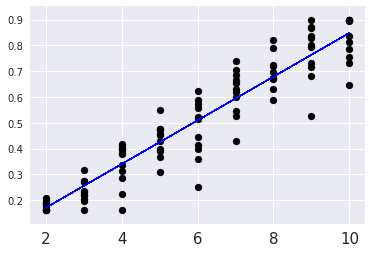

In [363]:
linear_regression_one(performances,'vehicles','totalEnergy')

R^2 value: 0.331622051135
RSS: 1889.15812014


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

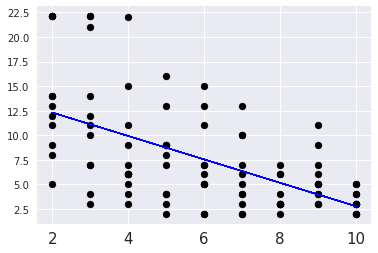

In [364]:
linear_regression_one(performances,'vehicles','averageWaitingTime')

### Vehicles and demands

In [365]:
feature_list = ['vehicles', 'demands']

In [366]:
energyReg = linear_regression_features(performances, 'totalEnergy')
performances['energyScore'] = performances.apply(lambda x: energyReg.predict(x[feature_list].values)[0], axis=1)

R^2 value: 0.890184274266
RSS: 0.586490694972


In [367]:
waitingReg = linear_regression_features(performances, 'averageWaitingTime')
performances['waitingScore'] = performances.apply(lambda x: waitingReg.predict(x[feature_list].values)[0], axis=1)

R^2 value: 0.395113769615
RSS: 1709.69993225


Add dummy variables to overcome different ranges of cost problem:

In [388]:
# Add boolean columns to overcome Multicollinearity
feature_list = []
for i in range(1, num_instances+1):
    col_name = ("b"+str(i))
    feature_list.append(col_name)

# Fill columns b1 to b(n-1), where n is the number of instances, with 1s in the appropriate position. 
# The last column remains 0
booleans = pd.DataFrame(0, index=performances.index, columns=feature_list)
for i in range(0, num_instances-1):
    for j in range(0,9):
        booleans.iloc[i*(9)+j][i] = 1

# Add the booleans values to the data
performances_bool = pd.concat([performances, booleans],axis=1)
feature_list.append('vehicles')
feature_list.append('demands')

In [389]:
feature_list

['b1',
 'b2',
 'b3',
 'b4',
 'b5',
 'b6',
 'b7',
 'b8',
 'b9',
 'b10',
 'b11',
 'vehicles',
 'demands']

In [390]:
regWaiting = linear_regression_features(performances_bool,'averageWaitingTime')


R^2 value: 0.529031298595
RSS: 1331.18447145


In [391]:
performances['waitingScore'] = performances_bool.apply(lambda x: regWaiting.predict(x[feature_list].values)[0], axis=1)

In [392]:
residuals = performances['averageWaitingTime'] - regWaiting.predict(performances_bool[feature_list].values)

In [393]:
regEnergy = linear_regression_features(performances_bool,'totalEnergy')

R^2 value: 0.905466216232
RSS: 0.50487472691


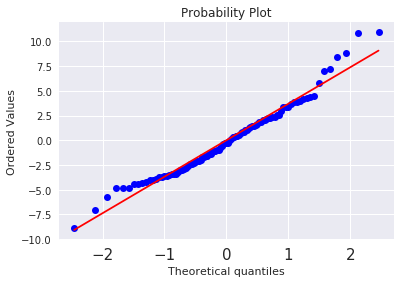

In [394]:
from scipy import stats
res = stats.probplot(residuals, plot=pp)

In [395]:
residuals = performances['totalEnergy'] - regEnergy.predict(performances_bool[feature_list].values)

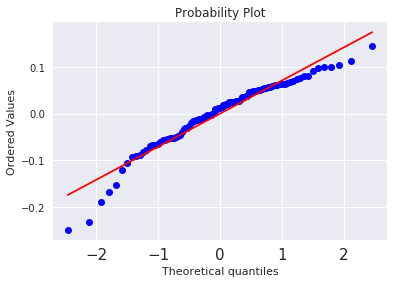

In [396]:
from scipy import stats
res = stats.probplot(residuals, plot=pp)

(array([  2.,   1.,   2.,   3.,  13.,  16.,  24.,  25.,  11.,   2.]),
 array([-0.24822139, -0.20891457, -0.16960775, -0.13030093, -0.09099411,
        -0.05168729, -0.01238047,  0.02692635,  0.06623317,  0.10553999,
         0.14484681]),
 <a list of 10 Patch objects>)

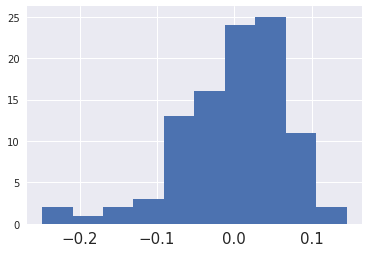

In [377]:
pp.hist(residuals)

In [397]:
performances['energyScore'] = performances_bool.apply(lambda x: regEnergy.predict(x[feature_list].values)[0], axis=1)

In [398]:
regCompletedBookings = linear_regression_features(performances_bool,'completedBookingsPercentage')

R^2 value: 0.609433007399
RSS: 0.766348549531


## Cost function

In [380]:
feature_list = [
 'vehicles',
 'demands']

In [86]:
def cost(df):
    if(df['waitingScore']<6):
        waitingCost = 0
    else:
        waitingCost = 1000
    return waitingCost + df['energyScore']

In [87]:
performances['regScore'] = performances.apply(cost , axis = 1)

In [88]:
optimalVehicles = performances.groupby(['demands'])['regScore'].transform(min) == performances['regScore']

In [403]:
optimalVehicles = waitok.groupby(['demands'])['vehicles'].transform(min) == waitok['vehicles']
optimalVehicles = waitok[optimalVehicles]
optimalVehicles

,time,demands,vehicles,totalEnergy,averageWaitingTime,maxWaitingTime,minWaitingTime,stabilityWaitingTime,averageJourneyTime,averageOccupancy,averageLoadFactor,maxLoadFactor,minLoadFactor,stabilityLoadFactor,completedBookingsPercentage,score,energyScore,waitingScore
2,2017-01-01T04:00:00.000Z,13.0,6,0.587918,5.0,18,0,18,13,0.392121,0.037269,0.107315,0.000000,0.107315,0.538462,0.732712,0.604179,5.777778
55,2017-01-01T13:00:00.000Z,15.0,6,0.625150,7.0,12,0,12,17,0.232653,0.023907,0.115838,0.000000,0.115838,0.400000,0.935611,0.526449,5.000000
21,2017-01-01T13:00:00.000Z,21.0,7,0.653519,2.0,4,1,3,14,0.511015,0.050366,0.271281,0.000000,0.271281,0.428571,0.290484,0.589152,5.249749
47,2017-01-01T13:00:00.000Z,23.0,10,0.836655,3.0,9,1,8,17,0.447056,0.046735,0.171436,0.000000,0.171436,0.434783,0.483225,0.817247,5.398995
43,2017-01-01T13:00:00.000Z,25.0,6,0.521764,5.0,12,0,12,17,1.534778,0.138085,0.394082,0.000000,0.394082,0.560000,0.337114,0.512386,5.241864
67,2017-01-01T13:00:00.000Z,27.0,9,0.730654,5.0,17,0,17,29,0.619925,0.058929,0.208386,0.000000,0.208386,0.407407,0.536689,0.730279,5.282579
72,2017-01-01T13:00:00.000Z,31.0,5,0.369490,4.0,9,0,9,16,0.733241,0.056589,0.096711,0.016605,0.080107,0.387097,0.394354,0.423052,5.428029
46,2017-01-01T13:00:00.000Z,36.0,8,0.696529,6.0,10,0,10,30,0.976444,0.113572,0.424822,0.000000,0.424822,0.500000,0.364696,0.669959,4.921720
92,2017-01-01T13:00:00.000Z,46.0,8,0.673129,6.0,16,0,16,26,2.286261,0.213269,0.453473,0.025802,0.427671,0.391304,0.339861,0.664143,5.155053
9,2017-01-01T17:00:00.000Z,58.0,10,0.896694,5.0,13,0,13,21,1.555204,0.159316,0.546439,0.000000,0.546439,0.517241,0.409302,0.823317,5.954550


R^2 value: 0.271737117401
RSS: 20.7554921541


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

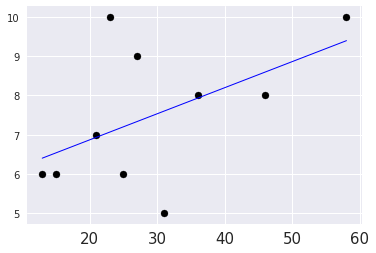

In [405]:
linear_regression_one(optimalVehicles, 'demands', 'vehicles')

In [400]:
waitok = performances[performances.waitingScore < 6]

In [401]:
waitokvehicules = waitok.groupby(['demands'])['vehicles'].transform(min) == waitok['vehicles']

In [402]:
waitokvehicules

2      True
1     False
0     False
4     False
7     False
55     True
54    False
53    False
52    False
51    False
21     True
20    False
19    False
18    False
47     True
43     True
63    False
61    False
60    False
67     True
68    False
72     True
73    False
76    False
77    False
74    False
75    False
46     True
83    False
84    False
92     True
91    False
90    False
9      True
Name: vehicles, dtype: bool

In [90]:
performances

,time,demands,vehicles,totalEnergy,averageWaitingTime,maxWaitingTime,minWaitingTime,stabilityWaitingTime,averageJourneyTime,averageOccupancy,averageLoadFactor,maxLoadFactor,minLoadFactor,stabilityLoadFactor,completedBookingsPercentage,energyScore,waitingScore,regScore
6,2017-01-01T04:00:00.000Z,13.0,2,0.209159,14.0,25,1,24,21,1.453333,0.151073,0.253337,0.048810,0.204527,0.615385,0.277612,10.601005,1000.277612
5,2017-01-01T04:00:00.000Z,13.0,3,0.318643,7.0,19,0,19,18,1.223032,0.120334,0.235721,0.045968,0.189753,0.769231,0.359254,9.395198,1000.359254
3,2017-01-01T04:00:00.000Z,13.0,4,0.419395,7.0,17,0,17,18,0.540686,0.062610,0.149427,0.000000,0.149427,0.615385,0.440895,8.189392,1000.440895
8,2017-01-01T04:00:00.000Z,13.0,5,0.550346,4.0,18,0,18,15,0.743944,0.071428,0.209601,0.000000,0.209601,0.769231,0.522537,6.983585,1000.522537
2,2017-01-01T04:00:00.000Z,13.0,6,0.587918,5.0,18,0,18,13,0.392121,0.037269,0.107315,0.000000,0.107315,0.538462,0.604179,5.777778,0.604179
1,2017-01-01T04:00:00.000Z,13.0,7,0.739564,3.0,9,0,9,16,0.446489,0.044536,0.257302,0.000000,0.257302,0.692308,0.685820,4.571971,0.685820
0,2017-01-01T04:00:00.000Z,13.0,8,0.819197,3.0,9,0,9,17,0.324294,0.032386,0.208132,0.000000,0.208132,0.615385,0.767462,3.366164,0.767462
4,2017-01-01T04:00:00.000Z,13.0,9,0.896694,6.0,15,0,15,20,0.357068,0.034275,0.208461,0.000000,0.208461,0.692308,0.849104,2.160357,0.849104
7,2017-01-01T04:00:00.000Z,13.0,10,0.896694,3.0,5,0,5,17,0.292861,0.027723,0.199490,0.000000,0.199490,0.615385,0.930746,0.954550,0.930746
59,2017-01-01T13:00:00.000Z,15.0,2,0.181231,5.0,10,0,10,14,0.756000,0.104239,0.119396,0.089082,0.030314,0.400000,0.199883,9.823228,1000.199883


In [91]:
#functionVehicles.coef_

In [92]:
optimalVehicles['optVehicles'] = optimalVehicles.apply(lambda x: x.demands* 0.18542689, axis =1)

TypeError: <lambda>() got an unexpected keyword argument 'axis'

In [93]:
feature_list = [
 'vehicles',
 'demands']
reg =linear_regression_one(optimalVehicles,'demands', 'vehicles')

KeyError: 'demands'

In [94]:
reg.estimator_.coef_

NameError: name 'reg' is not defined

In [95]:
0.14629664

0.14629664

In [96]:
0.14629664 * 13

1.90185632

In [97]:
def linear(x, a, b, *c):
    return np.hstack(b).dot(x)

# Non linear function fit

In [98]:
from scipy.optimize import curve_fit
# Exponential function
def func_exp(x, a, c, *b):
    return a * np.exp(np.hstack(b).dot(x)) + c

In [99]:
feature_list = ['b1',
 'b2',
 'b3',
 'b4',
 'b5',
 'b6',
 'b7',
 'b8',
 'b9',
 'b10',
 'b11',
 'vehicles',
 'demands']

In [100]:
# Cost~[ForecastError,b1,...,bn]
def exp_fit(data, cost):
    popt, pcov = curve_fit(func_exp, data[feature_list].T, data[cost],p0=np.zeros(len(feature_list)+2),maxfev=100000)
    residuals = data[cost] - func_exp(data[feature_list].T, popt[0], popt[1], *(popt[2:len(popt)].ravel()))
    ss_res = np.sum(residuals**2)
    print('RSS: '+ str(ss_res))
    return popt

In [101]:
# Cost~[ForecastError,b1,...,bn]
def poly_fit(data, cost):
    c,stats = np.polynomial.polynomial.polyfit(data[cost], data[feature_list], 2, full = True)
    residuals = stats[0]
    rss = np.sum(residuals)
    print('RSS: '+ str(rss))

In [102]:
popt=exp_fit(performances_bool, 'averageWaitingTime')

RSS: 1331.32252278


In [103]:
poly_fit(performances_bool, 'averageWaitingTime')

RSS: 15927.6602637


In [104]:
residuals = data[cost] - reg.predict(data[feature_list].values)



NameError: name 'data' is not defined

In [ ]:
feature_list = [
 'vehicles',
 'demands']

In [ ]:
popt=exp_fit(performances, 'score')

In [ ]:
popt=poly_fit(performances, 'score')

In [ ]:
poly_fit(performances, 'averageWaitingTime')
1331.18447145

In [ ]:
poly_fit(scale,'averageWaitingTime')

In [ ]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c
def fit(cost):
    # Exponential fit
    popt, pcov = curve_fit(func, performances['vehicles'].values.ravel(), performances[cost])
    residuals = performances[cost] - func(performances['vehicles'].values.ravel(), popt[0], popt[1], popt[2])
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((performances[cost]-np.mean(performances[cost]))**2)
    r_squared = 1 - (ss_res / ss_tot)
    print('Exp RSS: '+ str(ss_res))
    pp.plot(np.arange(2, 11, 1), func(np.arange(2, 11, 1), popt[0], popt[1], popt[2]), color='#50c94c',linewidth=3, label='Exponential Fit')
    #p = pp.boxplot([forecast0, forecast25, forecast50, forecast75, forecast1], positions=forecast_error, widths=[0.03]*5, manage_xticks=False,patch_artist=True)
    colors = ['#dce4f7']*9
    #for patch, color in zip(p['boxes'], colors):
    #    patch.set_facecolor(color)
    #    patch.set_color(color)
    pp.xticks(vehicles)
    pp.xlabel("vehicles")
    pp.ylabel("cost")
    pp.legend(loc=4)

Exp RSS: 2265.15643539


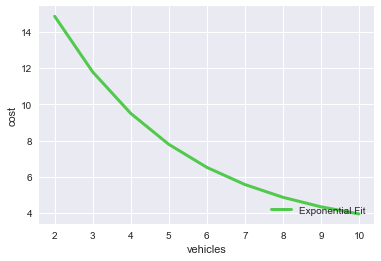

In [494]:
fit('averageWaitingTime')

In [492]:
np.arange(2, 11, 1)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

# Plot data

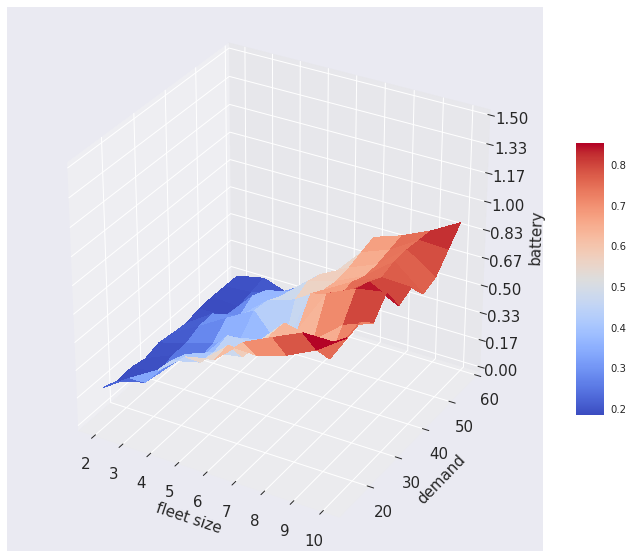

In [381]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.mlab import griddata

df = performances.copy()
x1 = np.linspace(df['vehicles'].min(), df['vehicles'].max(), len(df['vehicles'].unique()))
y1 = np.linspace(df['demands'].min(), df['demands'].max(), len(df['demands'].unique()))

x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
z2 = griddata(df['vehicles'], df['demands'], df['totalEnergy'], x2, y2, interp='linear')

# Ready to plot
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 1.5)
ax.set_ylabel("demand",fontsize=15,labelpad=10)
ax.set_xlabel("fleet size",fontsize=15,labelpad=10)
ax.set_zlabel("battery",fontsize=15, labelpad=15)


ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=10)
#plt.title('Total energy')
plt.savefig('battery.png')
plt.show()

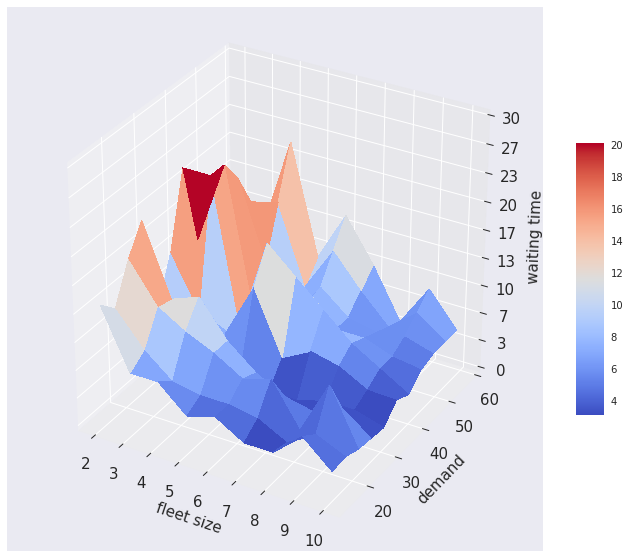

In [384]:

# Interpolate unstructured D-dimensional data.
z2 = griddata(df['vehicles'], df['demands'], df['averageWaitingTime'], x2, y2, interp='linear')

# Ready to plot
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 30)
ax.set_ylabel("demand",fontsize=15,labelpad=10)
ax.set_xlabel("fleet size",fontsize=15,labelpad=10)
ax.set_zlabel("waiting time",fontsize=15, labelpad=15)


ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

fig.colorbar(surf, shrink=0.5, aspect=10)
#plt.title('Total energy')
plt.savefig('waitingtime.png')
plt.show()

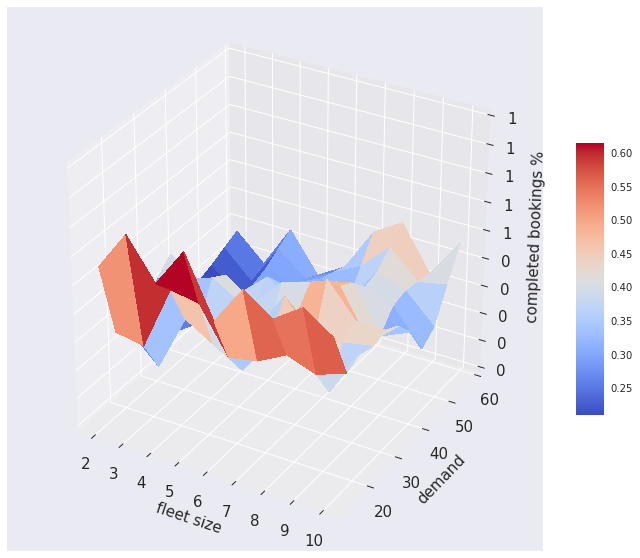

In [387]:

# Interpolate unstructured D-dimensional data.
z2 = griddata(df['vehicles'], df['demands'], df['completedBookingsPercentage'], x2, y2, interp='linear')

# Ready to plot
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 1)
ax.set_ylabel("demand",fontsize=15,labelpad=10)
ax.set_xlabel("fleet size",fontsize=15,labelpad=10)
ax.set_zlabel("completed bookings %",fontsize=15, labelpad=15)


ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

fig.colorbar(surf, shrink=0.5, aspect=10)
#plt.title('Total energy')
plt.savefig('completed.png')
plt.show()

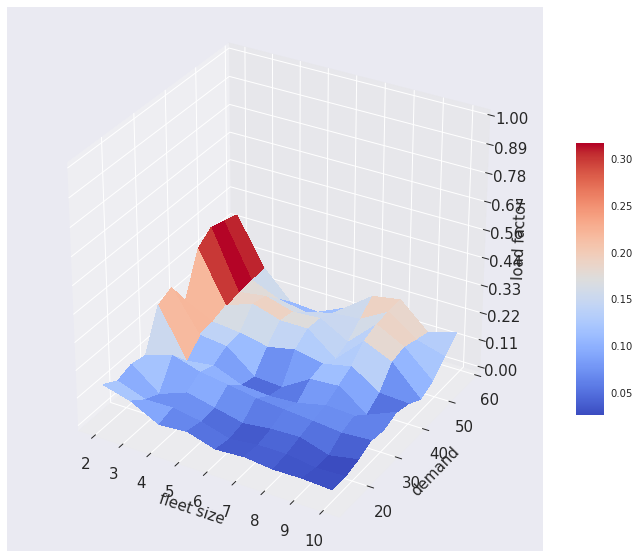

In [320]:
# Interpolate unstructured D-dimensional data.
z2 = griddata(df['vehicles'], df['demands'], df['averageLoadFactor'], x2, y2, interp='linear')

# Ready to plot
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 1)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_ylabel("demand",fontsize=15)
ax.set_xlabel("fleet size",fontsize=15)
ax.set_zlabel("load factor",fontsize=15)


fig.colorbar(surf, shrink=0.5, aspect=10)
plt.savefig('load.png')
plt.show()


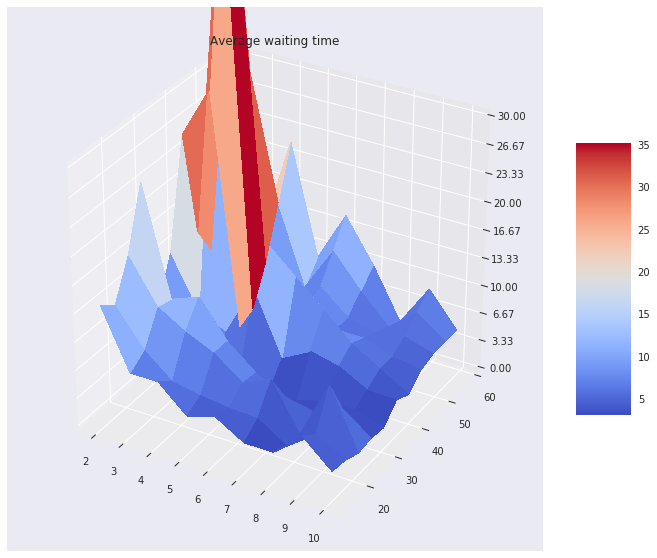

In [210]:
# Interpolate unstructured D-dimensional data.
z2 = griddata(df['vehicles'], df['demands'], df['averageWaitingTime'], x2, y2, interp='linear')

# Ready to plot
fig = plt.figure(figsize=(12,10))

ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 30)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Average waiting time')
plt.savefig('waitingtime.png')


plt.show()

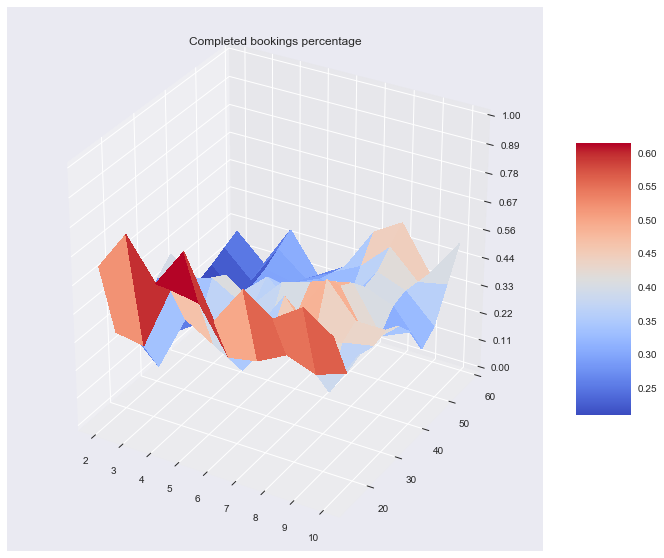

In [114]:
# Interpolate unstructured D-dimensional data.
z2 = griddata(df['vehicles'], df['demands'], df['completedBookingsPercentage'], x2, y2, interp='linear')

# Ready to plot
fig = plt.figure(figsize=(12,10))

ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 1)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Completed bookings percentage')
plt.savefig('completedbookings.png')


plt.show()

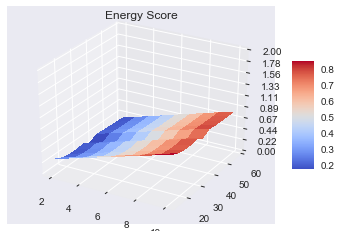

In [591]:
# Interpolate unstructured D-dimensional data.
z2 = griddata(df['vehicles'], df['demands'], df['energyScore'], x2, y2, interp='linear')

# Ready to plot
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 2)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Energy Score')
plt.savefig('waitingtime.png')


plt.show()

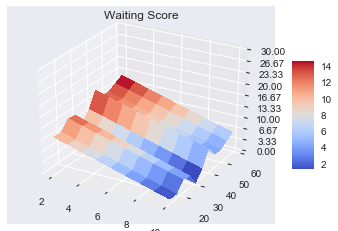

In [592]:
# Interpolate unstructured D-dimensional data.
z2 = griddata(df['vehicles'], df['demands'], df['waitingScore'], x2, y2, interp='linear')

# Ready to plot
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 30)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Waiting Score')

plt.show()

## Generate Constant demand over one hour

In [75]:
csv = 'demands/46_demands.csv'
demands = pd.read_csv(csv)
import datetime
nDemands = demands.shape[0]
interval = 3600.0/float(nDemands)

In [76]:
str(datetime.timedelta(seconds=interval))

In [78]:
import datetime
nDemands = demands.shape[0]
interval = 3600.0/float(nDemands)

In [79]:
str(datetime.timedelta(seconds=interval))

'0:01:32.307692'

In [82]:
interval = "1min32s"

In [83]:
rng = pd.date_range(start='2012-01-04 12:00:00', periods=nDemands,freq=interval)
demands['pickupTime'] = rng
demands['pickupTime'] = demands['pickupTime'].apply(lambda x: x.strftime('%H:%M:%S') + ' AM')
demands.to_csv(csv, index=False)